In [12]:
pip install pandas numpy scikit-learn nltk vaderSentiment matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.1 MB/s eta 0:00:00


In [19]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

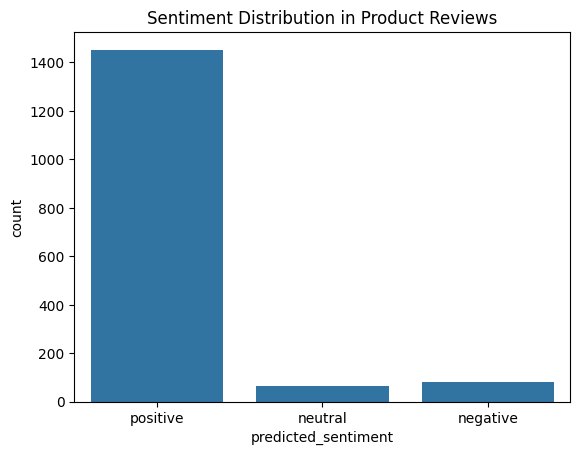

In [20]:

# 1. Load the dataset
# Replace 'product_reviews.csv' with the path to your dataset
df = pd.read_csv('/content/product reviews.csv')

def preprocess_text(text):
    text = text.lower()# Convert to lowercase
    tokens = text.split()# Split text into words (a simple tokenizer)
    stop_words = set(stopwords.words('english'))# Remove stopwords
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    lemmatizer = WordNetLemmatizer() #simply cuts off word endings to find a root word
    tokens = [lemmatizer.lemmatize(word) for word in tokens] #tokens breaks down text into smaller parts
    return ' '.join(tokens) #list of tokens back into a single string

# Apply preprocessing to 'reviews.text'
df['processed_review'] = df['reviews.text'].apply(preprocess_text)


# 3. Sentiment analysis using VADER
analyzer = SentimentIntensityAnalyzer()

# Function to assign sentiment label based on VADER scores
def get_sentiment_score(text):
    sentiment = analyzer.polarity_scores(text)
    if sentiment['compound'] >= 0.05:
        return 'positive'
    elif sentiment['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['predicted_sentiment'] = df['processed_review'].apply(get_sentiment_score)
sns.countplot(x='predicted_sentiment', data=df)
plt.title('Sentiment Distribution in Product Reviews')
plt.show()


In [29]:
pip install wordcloud

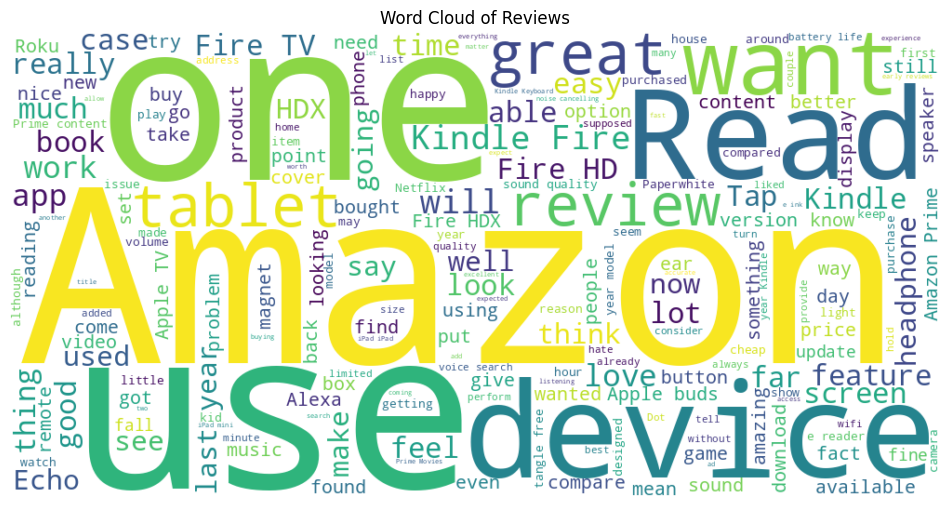

In [35]:
combined_text = " ".join(df['reviews.text'])  # or 'processed_review' if that's the correct column

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(combined_text)

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()